# Subset 1: Data Prep and Models

In [1]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

### Subset 1 from the `flights` table (0.3% of all data, selected randomly)

In [2]:
flights_sample = pd.read_csv('flights_ran_subset.csv', index_col=0)
flights_sample.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-03,WN,WN,WN,2570,WN,N248WN,2570,13232,MDW,...,691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-03,WN,WN,WN,450,WN,N411WN,450,14524,RIC,...,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-03,WN,WN,WN,1972,WN,N7888A,1972,14679,SAN,...,1313.0,0.0,0.0,7.0,0.0,28.0,NaN,NaN,NaN,NaN
3,2018-09-03,WN,WN,WN,1368,WN,N8612K,1368,14831,SJC,...,2421.0,0.0,0.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-09-03,WN,WN,WN,872,WN,N7887A,872,14831,SJC,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = flights_sample.copy()

### Drop the rows where arr_delay is null

In [4]:
df2 = df1.drop(df1.index[df1['arr_delay'].isnull()])
len(df2)

46576

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46576 entries, 0 to 47505
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              46576 non-null  object 
 1   mkt_unique_carrier   46576 non-null  object 
 2   branded_code_share   46576 non-null  object 
 3   mkt_carrier          46576 non-null  object 
 4   mkt_carrier_fl_num   46576 non-null  int64  
 5   op_unique_carrier    46576 non-null  object 
 6   tail_num             46576 non-null  object 
 7   op_carrier_fl_num    46576 non-null  int64  
 8   origin_airport_id    46576 non-null  int64  
 9   origin               46576 non-null  object 
 10  origin_city_name     46576 non-null  object 
 11  dest_airport_id      46576 non-null  int64  
 12  dest                 46576 non-null  object 
 13  dest_city_name       46576 non-null  object 
 14  crs_dep_time         46576 non-null  int64  
 15  dep_time             46576 non-null 

In [6]:
df2.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

### Drop some columns

In [5]:
to_drop = ['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num', 
           'tail_num', 'origin', 'origin_city_name', 'dest', 'dest_city_name', 'dep_time', 
           'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 
           'cancelled', 'cancellation_code', 'diverted', 'dup', 'actual_elapsed_time', 
           'air_time', 'flights', 'carrier_delay', 'weather_delay', 'nas_delay', 
           'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 
           'longest_add_gtime', 'no_name']

df2.drop(to_drop, axis=1, inplace=True)
df2.head()

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance
0,2018-09-03,WN,2570,13232,13851,910,1115,-11.0,125.0,691.0
1,2018-09-03,WN,450,14524,10397,605,750,-18.0,105.0,481.0
2,2018-09-03,WN,1972,14679,12191,1350,1855,35.0,185.0,1313.0
3,2018-09-03,WN,1368,14831,13204,1100,1910,19.0,310.0,2421.0
4,2018-09-03,WN,872,14831,14908,2015,2125,2.0,70.0,342.0


In [6]:
df2.isnull().sum()

# no missing values

fl_date              0
op_unique_carrier    0
op_carrier_fl_num    0
origin_airport_id    0
dest_airport_id      0
crs_dep_time         0
crs_arr_time         0
arr_delay            0
crs_elapsed_time     0
distance             0
dtype: int64

### Split attributes and target

In [9]:
df_x = df2.drop('arr_delay', axis=1)
df_x.head()

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0
3,2018-09-03,WN,1368,14831,13204,1100,1910,310.0,2421.0
4,2018-09-03,WN,872,14831,14908,2015,2125,70.0,342.0


In [10]:
y = df2['arr_delay'].values
y[:5]

array([-11., -18.,  35.,  19.,   2.])

In [59]:
# Summary statistics for arr_delay

df2['arr_delay'].describe()

count    46576.000000
mean         5.602327
std         50.677941
min        -85.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1493.000000
Name: arr_delay, dtype: float64

In [11]:
df_x.columns

Index(['fl_date', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance'],
      dtype='object')

### Convert fl_date to the datetime type and create new columns (month, day of week, week number)

In [12]:
df_x['fl_datetime'] = pd.to_datetime(df_x['fl_date'])
df_x.head(3)

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,fl_datetime
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0,2018-09-03
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0,2018-09-03
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0,2018-09-03


In [13]:
df_x['fl_month'] = df_x['fl_datetime'].dt.month

In [14]:
df_x['fl_dayofweek'] = df_x['fl_datetime'].dt.dayofweek

# 0 - Monday

In [16]:
#df_x['fl_week_num'] = df_x['fl_datetime'].dt.isocalendar().week

df_x['fl_week_num'] = df_x['fl_datetime'].dt.weekofyear

In [17]:
df_x.head(3)

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,fl_datetime,fl_month,fl_dayofweek,fl_week_num
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0,2018-09-03,9,0,36
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0,2018-09-03,9,0,36
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0,2018-09-03,9,0,36


### op_unique_carrier: ordinal encoding

In [18]:
enc_op_carrier = OrdinalEncoder()

df_x['op_unique_carrier_ord'] = enc_op_carrier.fit_transform(df_x[['op_unique_carrier']])
df_x.head(3)

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,fl_datetime,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0,2018-09-03,9,0,36,24.0
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0,2018-09-03,9,0,36,24.0
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0,2018-09-03,9,0,36,24.0


In [19]:
# ordinal encoding of op_carrier_fl_num

enc_fl_num = OrdinalEncoder()

df_x['op_carrier_fl_num_ord'] = enc_fl_num.fit_transform(df_x[['op_carrier_fl_num']])
df_x.head(3)

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,fl_datetime,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord,op_carrier_fl_num_ord
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0,2018-09-03,9,0,36,24.0,2561.0
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0,2018-09-03,9,0,36,24.0,446.0
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0,2018-09-03,9,0,36,24.0,1963.0


In [20]:
len(df_x['op_carrier_fl_num_ord'].unique())

6524

### crs_dep_time and crs_arr_time: convert from hhmm to minutes

In [21]:
def hhmm_to_min(time_hhmm):
    if time_hhmm//100 > 0:
        time_min = time_hhmm // 100 * 60 + time_hhmm % 100
    else:
        time_min = time_hhmm % 100
    return time_min

In [22]:
hhmm_to_min(155)

115

In [23]:
# Add new columns

df_x['crs_dep_time_min'] = df_x['crs_dep_time'].map(lambda x: hhmm_to_min(x))
df_x['crs_arr_time_min'] = df_x['crs_arr_time'].map(lambda x: hhmm_to_min(x))
df_x.head()


,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,fl_datetime,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord,op_carrier_fl_num_ord,crs_dep_time_min,crs_arr_time_min
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0,2018-09-03,9,0,36,24.0,2561.0,550,675
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0,2018-09-03,9,0,36,24.0,446.0,365,470
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0,2018-09-03,9,0,36,24.0,1963.0,830,1135
3,2018-09-03,WN,1368,14831,13204,1100,1910,310.0,2421.0,2018-09-03,9,0,36,24.0,1359.0,660,1150
4,2018-09-03,WN,872,14831,14908,2015,2125,70.0,342.0,2018-09-03,9,0,36,24.0,867.0,1215,1285


### Airports

In [24]:
# DF with origin airports ranked by percentage of departure delays (dep_delay > 0)

origin_airports = pd.read_csv('df_airport_ranking.csv', index_col=0)
origin_airports.head()

,origin_airport_id,delay_percent,Ranking
200,12899,11.390285,1
112,11525,12.036336,2
306,14582,12.582781,3
156,12129,12.590217,4
215,13127,12.984249,5


In [25]:
# Dictionary for mapping origin_airport_id to airport rank (ordinal code)

origin_airports_dict = {}

for origin_airport_id, delay_percent, ranking in origin_airports.itertuples(index=False, name=None):
    origin_airports_dict[origin_airport_id] = ranking

In [26]:
origin_airports_dict

{12899: 1,
 11525: 2,
 14582: 3,
 12129: 4,
 13127: 5,
 14709: 6,
 11468: 7,
 10779: 8,
 10558: 9,
 14113: 10,
 10754: 11,
 10739: 12,
 11630: 13,
 14543: 14,
 11921: 15,
 13873: 16,
 13184: 17,
 12343: 18,
 10631: 19,
 10747: 20,
 11122: 21,
 11447: 22,
 14588: 23,
 11695: 24,
 15074: 25,
 16218: 26,
 14828: 27,
 14520: 28,
 12492: 29,
 10158: 30,
 12902: 31,
 12915: 32,
 12888: 33,
 11049: 34,
 12177: 35,
 10469: 36,
 12003: 37,
 10918: 38,
 15582: 39,
 15389: 40,
 10731: 41,
 10561: 42,
 12156: 43,
 10409: 44,
 12365: 45,
 11537: 46,
 15991: 47,
 15841: 48,
 11898: 49,
 11471: 50,
 11865: 51,
 14955: 52,
 10299: 53,
 11203: 54,
 12389: 55,
 11905: 56,
 12898: 57,
 12007: 58,
 12244: 59,
 12402: 60,
 14288: 61,
 11648: 62,
 13970: 63,
 13344: 64,
 12523: 65,
 14711: 66,
 11315: 67,
 15041: 68,
 10620: 69,
 12758: 70,
 14256: 71,
 11977: 72,
 12519: 73,
 10185: 74,
 10577: 75,
 12016: 76,
 11092: 77,
 13433: 78,
 14674: 79,
 14112: 80,
 14794: 81,
 13061: 82,
 12280: 83,
 15607: 84,
 

In [27]:
# New columns with ordinal codes for origin and dest airports

df_x['origin_airport_code'] = df_x['origin_airport_id'].map(origin_airports_dict)
df_x['dest_airport_code'] = df_x['dest_airport_id'].map(origin_airports_dict)
df_x.head(3)

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,fl_datetime,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord,op_carrier_fl_num_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
0,2018-09-03,WN,2570,13232,13851,910,1115,125.0,691.0,2018-09-03,9,0,36,24.0,2561.0,550,675,373,242
1,2018-09-03,WN,450,14524,10397,605,750,105.0,481.0,2018-09-03,9,0,36,24.0,446.0,365,470,271,321
2,2018-09-03,WN,1972,14679,12191,1350,1855,185.0,1313.0,2018-09-03,9,0,36,24.0,1963.0,830,1135,325,370


In [46]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46576 entries, 0 to 47505
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fl_date                46576 non-null  object        
 1   op_unique_carrier      46576 non-null  object        
 2   op_carrier_fl_num      46576 non-null  int64         
 3   origin_airport_id      46576 non-null  int64         
 4   dest_airport_id        46576 non-null  int64         
 5   crs_dep_time           46576 non-null  int64         
 6   crs_arr_time           46576 non-null  int64         
 7   crs_elapsed_time       46576 non-null  float64       
 8   distance               46576 non-null  float64       
 9   fl_datetime            46576 non-null  datetime64[ns]
 10  fl_month               46576 non-null  int64         
 11  fl_dayofweek           46576 non-null  int64         
 12  fl_week_num            46576 non-null  UInt32        
 13  o

In [47]:
df_x.columns

Index(['fl_date', 'op_unique_carrier', 'op_carrier_fl_num',
       'origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'fl_datetime', 'fl_month',
       'fl_dayofweek', 'fl_week_num', 'op_unique_carrier_ord',
       'op_carrier_fl_num_ord', 'crs_dep_time_min', 'crs_arr_time_min',
       'origin_airport_code', 'dest_airport_code'],
      dtype='object')

In [28]:
# Drop columns that will not be used for modelling

df_x_2 = df_x.drop(['fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 
                    'dest_airport_id', 'crs_dep_time', 'crs_arr_time', 'fl_datetime'], axis=1)
df_x_2.head()

,crs_elapsed_time,distance,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord,op_carrier_fl_num_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
0,125.0,691.0,9,0,36,24.0,2561.0,550,675,373,242
1,105.0,481.0,9,0,36,24.0,446.0,365,470,271,321
2,185.0,1313.0,9,0,36,24.0,1963.0,830,1135,325,370
3,310.0,2421.0,9,0,36,24.0,1359.0,660,1150,305,342
4,70.0,342.0,9,0,36,24.0,867.0,1215,1285,305,306


In [29]:
df_x_2.describe()

,crs_elapsed_time,distance,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord,op_carrier_fl_num_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
count,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000
mean,137.959185,769.668692,6.591098,2.932970,26.738900,14.613299,2711.678289,809.167661,902.914162,282.791116,283.126245
std,71.803922,588.550834,3.390719,1.996953,14.814887,8.660979,1836.206856,294.030395,310.668257,71.836097,71.810015
min,20.000000,31.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,87.000000,344.000000,4.000000,1.000000,14.000000,8.000000,1115.750000,556.000000,660.000000,242.000000,245.000000
50%,119.000000,604.000000,7.000000,3.000000,27.000000,17.000000,2318.000000,802.000000,914.000000,312.000000,312.000000
75%,167.000000,1005.000000,10.000000,5.000000,39.000000,24.000000,4287.000000,1055.000000,1158.000000,333.000000,333.000000
max,690.000000,5095.000000,12.000000,6.000000,52.000000,27.000000,6523.000000,1439.000000,1439.000000,375.000000,373.000000


In [33]:
df_corr = df_x_2.corr()
df_corr

# High linear correlation:
# crs_elapsed_time and distance
# fl_month and fl_week_num

,crs_elapsed_time,distance,fl_month,fl_dayofweek,fl_week_num,op_unique_carrier_ord,op_carrier_fl_num_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
crs_elapsed_time,1.000000,0.982804,-0.007559,0.005612,-0.006533,-0.174042,-0.331543,-0.018329,0.025466,0.160528,0.186423
distance,0.982804,1.000000,-0.001233,0.006790,-0.000143,-0.153030,-0.362481,-0.009234,0.020639,0.169710,0.170164
fl_month,-0.007559,-0.001233,1.000000,0.011674,0.974855,-0.004955,0.007881,-0.000064,-0.002269,-0.002134,-0.006011
fl_dayofweek,0.005612,0.006790,0.011674,1.000000,0.010541,0.003643,0.062805,0.004081,0.004995,-0.004486,-0.000420
fl_week_num,-0.006533,-0.000143,0.974855,0.010541,1.000000,-0.005435,0.006668,0.000013,-0.002196,-0.001480,-0.004740
op_unique_carrier_ord,-0.174042,-0.153030,-0.004955,0.003643,-0.005435,1.000000,0.263770,0.000111,-0.003536,-0.007603,-0.001500
op_carrier_fl_num_ord,-0.331543,-0.362481,0.007881,0.062805,0.006668,0.263770,1.000000,-0.002463,0.007407,-0.184524,-0.188719
crs_dep_time_min,-0.018329,-0.009234,-0.000064,0.004081,0.000013,0.000111,-0.002463,1.000000,0.699634,0.084459,-0.091399
crs_arr_time_min,0.025466,0.020639,-0.002269,0.004995,-0.002196,-0.003536,0.007407,0.699634,1.000000,0.082640,-0.061363
origin_airport_code,0.160528,0.169710,-0.002134,-0.004486,-0.001480,-0.007603,-0.184524,0.084459,0.082640,1.000000,0.023145


In [ ]:
# sns.pairplot(df_x_2)

### Check variable distributions before and after log transformation

distance, crs_elapsed_time, crs_dep_time_min and crs_arr_time_min

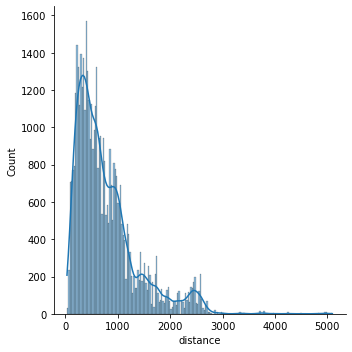

In [39]:
sns.displot(data=df_x_2, x="distance", kde=True, bins=200);

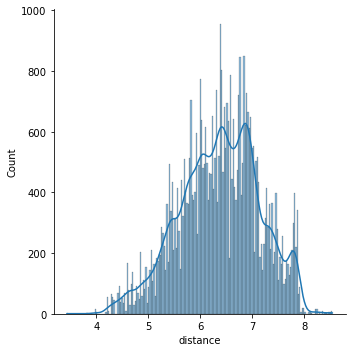

In [44]:
distance_log = np.log(df_x_2['distance'])
sns.displot(x=distance_log, kde=True, bins=200);

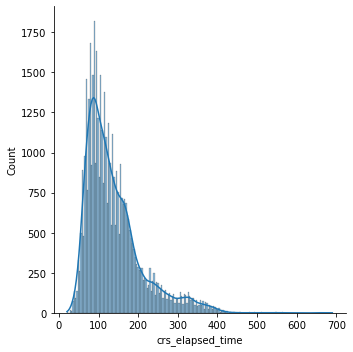

In [40]:
sns.displot(data=df_x_2, x="crs_elapsed_time", kde=True, bins=200);

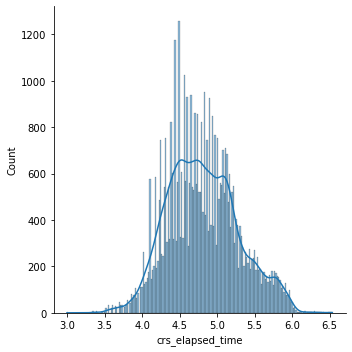

In [45]:
crs_elapsed_time_log = np.log(df_x_2['crs_elapsed_time'])
sns.displot(x=crs_elapsed_time_log, kde=True, bins=200);

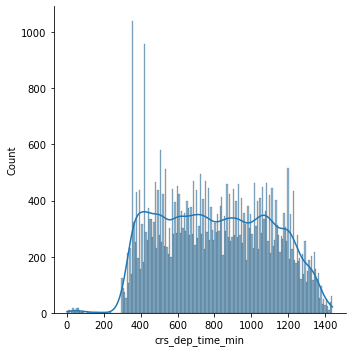

In [42]:
sns.displot(data=df_x_2, x="crs_dep_time_min", kde=True, bins=200);

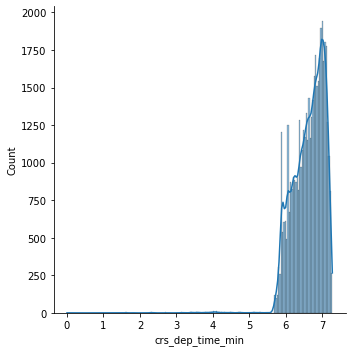

In [46]:
crs_dep_time_min_log = np.log(df_x_2['crs_dep_time_min'])
sns.displot(x=crs_dep_time_min_log, kde=True, bins=200);

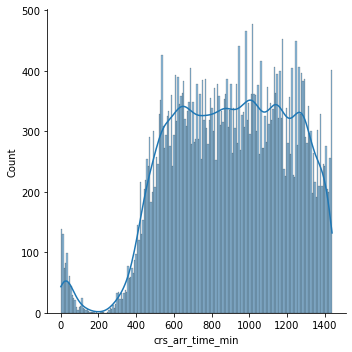

In [43]:
sns.displot(data=df_x_2, x="crs_arr_time_min", kde=True, bins=200);

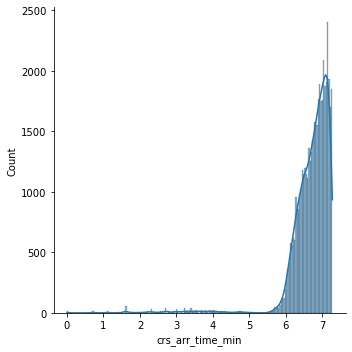

In [47]:
crs_arr_time_min_log = np.log(df_x_2['crs_arr_time_min'])
sns.displot(x=crs_arr_time_min_log, kde=True, bins=200);

In [ ]:
# ? perform log transformation for distance

In [49]:
# Drop some columns

df_x_3 = df_x_2.drop(['crs_elapsed_time', 'fl_month', 'op_carrier_fl_num_ord'], axis=1)
df_x_3.head()

# 8 features, all have numeric data types

,distance,fl_dayofweek,fl_week_num,op_unique_carrier_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
0,691.0,0,36,24.0,550,675,373,242
1,481.0,0,36,24.0,365,470,271,321
2,1313.0,0,36,24.0,830,1135,325,370
3,2421.0,0,36,24.0,660,1150,305,342
4,342.0,0,36,24.0,1215,1285,305,306


### Scale 8 features: MinMax with range (0, 10)

In [50]:
scaler_minmax_10 = MinMaxScaler(feature_range=(0, 10))
df_scaled = pd.DataFrame(scaler_minmax_10.fit_transform(df_x_3.astype(float)))
df_scaled.columns = df_x_3.columns
df_scaled.head()

,distance,fl_dayofweek,fl_week_num,op_unique_carrier_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
0,1.303318,0.0,6.862745,8.888889,3.817803,4.687065,9.946524,6.478495
1,0.888626,0.0,6.862745,8.888889,2.531293,3.261474,7.219251,8.602151
2,2.531596,0.0,6.862745,8.888889,5.764951,7.885953,8.663102,9.919355
3,4.719589,0.0,6.862745,8.888889,4.582754,7.990264,8.128342,9.166667
4,0.614139,0.0,6.862745,8.888889,8.442281,8.929068,8.128342,8.198925


In [51]:
df_scaled.describe()

,distance,fl_dayofweek,fl_week_num,op_unique_carrier_ord,crs_dep_time_min,crs_arr_time_min,origin_airport_code,dest_airport_code
count,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000
mean,1.458666,4.888283,5.046843,5.412333,5.620081,6.272004,7.534522,7.584039
std,1.162225,3.328255,2.904880,3.207770,2.044718,2.160419,1.920751,1.930377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.618088,1.666667,2.549020,2.962963,3.859527,4.582754,6.443850,6.559140
50%,1.131517,5.000000,5.098039,6.296296,5.570236,6.349096,8.315508,8.360215
75%,1.923381,8.333333,7.450980,8.888889,7.329624,8.045897,8.877005,8.924731
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [52]:
# Scaled features for training - NumPy array

X = df_scaled.values
X[:5]

array([[1.30331754, 0.        , 6.8627451 , 8.88888889, 3.8178025 ,
        4.68706537, 9.94652406, 6.47849462],
       [0.88862559, 0.        , 6.8627451 , 8.88888889, 2.53129346,
        3.26147427, 7.21925134, 8.60215054],
       [2.53159558, 0.        , 6.8627451 , 8.88888889, 5.76495132,
        7.88595271, 8.6631016 , 9.91935484],
       [4.71958926, 0.        , 6.8627451 , 8.88888889, 4.58275382,
        7.99026426, 8.12834225, 9.16666667],
       [0.61413902, 0.        , 6.8627451 , 8.88888889, 8.44228095,
        8.92906815, 8.12834225, 8.19892473]])

In [54]:
# Target for training - NumPy array
y

array([-11., -18.,  35., ..., -17.,  -8.,  -7.])

In [57]:
y.mean()

5.602327378907592

### Functions to compute the training and cross-validation RMSEs

In [55]:
# Function to evaluate the model and compute the RMSE

from sklearn.metrics import mean_squared_error

def compute_rmse(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse



# Function to display the cross-validation scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Linear Regression

In [56]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Training error (RMSE) for the Linear Regression model
lin_rmse = compute_rmse(lin_reg, X, y)
lin_rmse

50.43019056941703

In [58]:
# Evaluation using cross-validation

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=5)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [52.08631319 49.10626327 52.33500704 42.0483601  55.69762205]
Mean: 50.25471312980252
Standard deviation: 4.6037116814776216


## Lasso Regression

In [60]:
# GridSearchCV for the Lasso Regression model

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(tol=0.05, random_state=42)

param_grid = [{'alpha': [0.001, 0.01, 0.1, 1, 10]}]

grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_lasso.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(random_state=42, tol=0.05),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10]}],
             scoring='neg_mean_squared_error')

In [61]:
# The best parameter and the corresponding mean RMSE score (for cross-validation)

print(grid_search_lasso.best_params_)
print(np.sqrt(-grid_search_lasso.best_score_))

{'alpha': 0.1}
50.4640073787355


In [62]:
# The best Lasso model
best_lasso = grid_search_lasso.best_estimator_

# Training error
lasso_rmse = compute_rmse(best_lasso, X, y)
print(lasso_rmse)

50.430420184399885


In [77]:
best_lasso.coef_

# very low importance of the op_unique_carrier_ord feature

array([-0.63002021, -0.13708316, -0.16565014,  0.00562743,  1.4643719 ,
        0.99553635,  0.38375433,  0.4371415 ])

## Ridge Regression

In [64]:
# GridSearchCV for the Ridge Regression model

from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

param_grid = [{'alpha': [0.001, 0.01, 0.1, 1, 10]}]

grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X, y)

# The best parameter and the corresponding mean RMSE score (for cross-validation)
print(grid_search_ridge.best_params_)
print(np.sqrt(-grid_search_ridge.best_score_))

{'alpha': 10}
50.46513807263458


In [66]:
# The best Ridge model
best_ridge = grid_search_ridge.best_estimator_

# Training error
ridge_rmse = compute_rmse(best_ridge, X, y)
print(ridge_rmse)

50.430190569938596


In [78]:
best_ridge.coef_

# very low importance of the op_unique_carrier_ord feature

array([-0.72548748, -0.14573252, -0.17711191,  0.01039853,  1.4359359 ,
        1.03601539,  0.41861702,  0.47287937])

## Polynomial Regression Model (degree=2)

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Training error
poly_rmse = compute_rmse(poly_reg, poly_features.transform(X), y)
print(poly_rmse)

50.35758546089625


In [68]:
# Evaluation using cross-validation

poly_scores = cross_val_score(poly_reg, X_poly, y,
                              scoring="neg_mean_squared_error", cv=5)

poly_rmse_scores = np.sqrt(-poly_scores)
display_scores(poly_rmse_scores)

Scores: [52.03953364 49.08892324 52.30583324 41.98614383 55.75153545]
Mean: 50.23439388011275
Standard deviation: 4.633227243729233


## Random Forest Regression

In [69]:
# Random Forest Regressor with standard hyperparameters

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X, y)

# Training error
forest_rmse = compute_rmse(forest_reg, X, y)
print(forest_rmse)

19.346608127491816


In [70]:
# Cross-validation

forest_scores = cross_val_score(forest_reg, X, y,
                                scoring="neg_mean_squared_error", cv=5)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53.87821535 51.20959356 53.59832942 45.0853493  56.84319171]
Mean: 52.12293587034027
Standard deviation: 3.9471616704758294


Cross-val error is much higher than training error (overfitting). 

Try tuning the random forest:

In [71]:
# Tuning the Random Forest using grid search

param_grid_rf = [
    {'n_estimators': [50, 100, 150], 'min_samples_leaf': [4, 6, 8]}
  ]

rf_reg = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5,
                              scoring='neg_mean_squared_error', 
                              return_train_score=True)

grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'min_samples_leaf': [4, 6, 8],
                          'n_estimators': [50, 100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
# The best parameters

grid_search_rf.best_params_

{'min_samples_leaf': 8, 'n_estimators': 150}

In [73]:
# The RMSEs and parameters
# For the parameters {'min_samples_leaf': 8, 'n_estimators': 150}: the RMSE is approximately 50.54

cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50.95097433088006 {'min_samples_leaf': 4, 'n_estimators': 50}
50.86318093837595 {'min_samples_leaf': 4, 'n_estimators': 100}
50.83346758640643 {'min_samples_leaf': 4, 'n_estimators': 150}
50.7200625471051 {'min_samples_leaf': 6, 'n_estimators': 50}
50.659529928742174 {'min_samples_leaf': 6, 'n_estimators': 100}
50.63083478990173 {'min_samples_leaf': 6, 'n_estimators': 150}
50.60716039759223 {'min_samples_leaf': 8, 'n_estimators': 50}
50.566788392764806 {'min_samples_leaf': 8, 'n_estimators': 100}
50.54185586119531 {'min_samples_leaf': 8, 'n_estimators': 150}


In [74]:
# Feature importances

feature_importances = grid_search_rf.best_estimator_.feature_importances_
feature_importances

array([0.16690105, 0.05964217, 0.12663253, 0.08223157, 0.14675837,
       0.17272447, 0.12398101, 0.12112884])

In [75]:
# Sorted feature importances

sorted(zip(feature_importances, df_scaled.columns), reverse=True)

# low importance of the op_unique_carrier_ord  and fl_dayofweek features

[(0.17272446510372583, 'crs_arr_time_min'),
 (0.16690105319583423, 'distance'),
 (0.14675836717470353, 'crs_dep_time_min'),
 (0.12663252979568215, 'fl_week_num'),
 (0.12398100740061399, 'origin_airport_code'),
 (0.12112883979113753, 'dest_airport_code'),
 (0.08223156782393128, 'op_unique_carrier_ord'),
 (0.05964216971437146, 'fl_dayofweek')]

In [76]:
# The best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Training error
rf_rmse = compute_rmse(best_rf, X, y)
print(rf_rmse)

42.96330871832314


#### The cross-val RMSE was about 50 for all these models